# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [2]:
!pip install pymongo

     |████████████████████████████████| 508 kB 19.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 14.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install tweepy

     |████████████████████████████████| 147 kB 21.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
!pip install twitter

     |████████████████████████████████| 54 kB 587 kB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [8]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [9]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [11]:
client = MongoClient(mongod_connect)
db = client.gp25 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [12]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [13]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [14]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1326986012740947975
1326986013324025856
1326986013802115073
1326986014238404610
1326986014628327424
1326986014892572672
1326986015437959169
1326986015492300800
1326986017048588290
1326986016989835264
1326986018269114371
1326986018789208078
1326986018478837761
1326986019309309957
1326986020223660032
1326986020655652866
1326986020957646853
1326986021855244290
1326986022018748419
1326986022270406662
1326986022362734593
1326986023314853889
1326986023394545671
1326986023679758337
1326986023914573824
1326986023973240832
1326986024640262157
1326986025730789377
1326986026041159695
1326986026053603328
1326986027370770432
1326986027400110083
1326986027328811021
1326986028226400262
1326986028851343360
1326986029534855168
1326986029967036419
1326986030055116802
1326986029857972225
1326986031237828608
1326986031619584001
1326986032361975819
1326986032752046082
1326986032735260672
1326986034056474626
1326986034991783943
1326986035054653440
1326986036753412100
1326986037328044033
1326986038666022913


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [15]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [16]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [17]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 12 20:34:32 +0000 2020'
'Thu Nov 12 20:34:32 +0000 2020'
'Thu Nov 12 20:34:32 +0000 2020'
'Thu Nov 12 20:34:32 +0000 2020'
'Thu Nov 12 20:34:32 +0000 2020'
'Thu Nov 12 20:34:32 +0000 2020'
'Thu Nov 12 20:34:32 +0000 2020'
'Thu Nov 12 20:34:31 +0000 2020'
'Thu Nov 12 20:34:31 +0000 2020'
'Thu Nov 12 20:34:31 +0000 2020'
'Thu Nov 12 20:34:31 +0000 2020'
'Thu Nov 12 20:34:31 +0000 2020'
'Thu Nov 12 20:34:30 +0000 2020'
'Thu Nov 12 20:34:30 +0000 2020'
'Thu Nov 12 20:34:30 +0000 2020'
'Thu Nov 12 20:34:30 +0000 2020'
'Thu Nov 12 20:34:30 +0000 2020'
'Thu Nov 12 20:34:29 +0000 2020'
'Thu Nov 12 20:34:29 +0000 2020'
'Thu Nov 12 20:34:28 +0000 2020'
'Thu Nov 12 20:34:28 +0000 2020'
'Thu Nov 12 20:34:28 +0000 2020'
'Thu Nov 12 20:34:28 +0000 2020'
'Thu Nov 12 20:34:28 +0000 2020'
'Thu Nov 12 20:34:28 +0000 2020'
'Thu Nov 12 20:34:28 +0000 2020'
'Thu Nov 12 20:34:28 +0000 2020'
'Thu Nov 12 20:34:27 +0000 2020'
'Thu Nov 12 20:34:27 +0000 2020'
'Thu Nov 12 20:34:27 +0000 2020'
'Thu Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [18]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 12 20:34:10 +0000 2020'
'Thu Nov 12 20:34:10 +0000 2020'
'Thu Nov 12 20:34:10 +0000 2020'
'Thu Nov 12 20:34:10 +0000 2020'
'Thu Nov 12 20:34:10 +0000 2020'
'Thu Nov 12 20:34:09 +0000 2020'
'Thu Nov 12 20:34:09 +0000 2020'
'Thu Nov 12 20:34:09 +0000 2020'
'Thu Nov 12 20:34:09 +0000 2020'
'Thu Nov 12 20:34:08 +0000 2020'
'Thu Nov 12 20:34:08 +0000 2020'
'Thu Nov 12 20:34:08 +0000 2020'
'Thu Nov 12 20:34:08 +0000 2020'
'Thu Nov 12 20:34:08 +0000 2020'
'Thu Nov 12 20:34:08 +0000 2020'
'Thu Nov 12 20:34:08 +0000 2020'
'Thu Nov 12 20:34:08 +0000 2020'
'Thu Nov 12 20:34:07 +0000 2020'
'Thu Nov 12 20:34:07 +0000 2020'
'Thu Nov 12 20:34:07 +0000 2020'
'Thu Nov 12 20:34:07 +0000 2020'
'Thu Nov 12 20:34:07 +0000 2020'
'Thu Nov 12 20:34:07 +0000 2020'
'Thu Nov 12 20:34:07 +0000 2020'
'Thu Nov 12 20:34:06 +0000 2020'
'Thu Nov 12 20:34:06 +0000 2020'
'Thu Nov 12 20:34:05 +0000 2020'
'Thu Nov 12 20:34:05 +0000 2020'
'Thu Nov 12 20:34:05 +0000 2020'
'Thu Nov 12 20:34:05 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:33:20 +0000 2020'
'Thu Nov 12 20:33:20 +0000 2020'
'Thu Nov 12 20:33:20 +0000 2020'
'Thu Nov 12 20:33:20 +0000 2020'
'Thu Nov 12 20:33:20 +0000 2020'
'Thu Nov 12 20:33:19 +0000 2020'
'Thu Nov 12 20:33:19 +0000 2020'
'Thu Nov 12 20:33:19 +0000 2020'
'Thu Nov 12 20:33:19 +0000 2020'
'Thu Nov 12 20:33:18 +0000 2020'
'Thu Nov 12 20:33:18 +0000 2020'
'Thu Nov 12 20:33:18 +0000 2020'
'Thu Nov 12 20:33:18 +0000 2020'
'Thu Nov 12 20:33:18 +0000 2020'
'Thu Nov 12 20:33:18 +0000 2020'
'Thu Nov 12 20:33:18 +0000 2020'
'Thu Nov 12 20:33:17 +0000 2020'
'Thu Nov 12 20:33:17 +0000 2020'
'Thu Nov 12 20:33:17 +0000 2020'
'Thu Nov 12 20:33:17 +0000 2020'
'Thu Nov 12 20:33:16 +0000 2020'
'Thu Nov 12 20:33:16 +0000 2020'
'Thu Nov 12 20:33:16 +0000 2020'
'Thu Nov 12 20:33:15 +0000 2020'
'Thu Nov 12 20:33:15 +0000 2020'
'Thu Nov 12 20:33:15 +0000 2020'
'Thu Nov 12 20:33:15 +0000 2020'
'Thu Nov 12 20:33:14 +0000 2020'
'Thu Nov 12 20:33:14 +0000 2020'
'Thu Nov 12 20:33:14 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:32:30 +0000 2020'
'Thu Nov 12 20:32:30 +0000 2020'
'Thu Nov 12 20:32:29 +0000 2020'
'Thu Nov 12 20:32:29 +0000 2020'
'Thu Nov 12 20:32:29 +0000 2020'
'Thu Nov 12 20:32:29 +0000 2020'
'Thu Nov 12 20:32:29 +0000 2020'
'Thu Nov 12 20:32:29 +0000 2020'
'Thu Nov 12 20:32:29 +0000 2020'
'Thu Nov 12 20:32:29 +0000 2020'
'Thu Nov 12 20:32:29 +0000 2020'
'Thu Nov 12 20:32:28 +0000 2020'
'Thu Nov 12 20:32:28 +0000 2020'
'Thu Nov 12 20:32:28 +0000 2020'
'Thu Nov 12 20:32:28 +0000 2020'
'Thu Nov 12 20:32:27 +0000 2020'
'Thu Nov 12 20:32:27 +0000 2020'
'Thu Nov 12 20:32:27 +0000 2020'
'Thu Nov 12 20:32:27 +0000 2020'
'Thu Nov 12 20:32:27 +0000 2020'
'Thu Nov 12 20:32:27 +0000 2020'
'Thu Nov 12 20:32:27 +0000 2020'
'Thu Nov 12 20:32:26 +0000 2020'
'Thu Nov 12 20:32:26 +0000 2020'
'Thu Nov 12 20:32:26 +0000 2020'
'Thu Nov 12 20:32:26 +0000 2020'
'Thu Nov 12 20:32:25 +0000 2020'
'Thu Nov 12 20:32:25 +0000 2020'
'Thu Nov 12 20:32:25 +0000 2020'
'Thu Nov 12 20:32:25 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:31:16 +0000 2020'
'Thu Nov 12 20:31:15 +0000 2020'
'Thu Nov 12 20:31:15 +0000 2020'
'Thu Nov 12 20:31:15 +0000 2020'
'Thu Nov 12 20:31:15 +0000 2020'
'Thu Nov 12 20:31:14 +0000 2020'
'Thu Nov 12 20:31:14 +0000 2020'
'Thu Nov 12 20:31:14 +0000 2020'
'Thu Nov 12 20:31:14 +0000 2020'
'Thu Nov 12 20:31:13 +0000 2020'
'Thu Nov 12 20:31:13 +0000 2020'
'Thu Nov 12 20:31:13 +0000 2020'
'Thu Nov 12 20:31:13 +0000 2020'
'Thu Nov 12 20:31:13 +0000 2020'
'Thu Nov 12 20:31:13 +0000 2020'
'Thu Nov 12 20:31:12 +0000 2020'
'Thu Nov 12 20:31:12 +0000 2020'
'Thu Nov 12 20:31:12 +0000 2020'
'Thu Nov 12 20:31:11 +0000 2020'
'Thu Nov 12 20:31:11 +0000 2020'
'Thu Nov 12 20:31:11 +0000 2020'
'Thu Nov 12 20:31:11 +0000 2020'
'Thu Nov 12 20:31:11 +0000 2020'
'Thu Nov 12 20:31:11 +0000 2020'
'Thu Nov 12 20:31:11 +0000 2020'
'Thu Nov 12 20:31:10 +0000 2020'
'Thu Nov 12 20:31:10 +0000 2020'
'Thu Nov 12 20:31:10 +0000 2020'
'Thu Nov 12 20:31:10 +0000 2020'
'Thu Nov 12 20:31:10 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:30:27 +0000 2020'
'Thu Nov 12 20:30:27 +0000 2020'
'Thu Nov 12 20:30:27 +0000 2020'
'Thu Nov 12 20:30:27 +0000 2020'
'Thu Nov 12 20:30:26 +0000 2020'
'Thu Nov 12 20:30:26 +0000 2020'
'Thu Nov 12 20:30:26 +0000 2020'
'Thu Nov 12 20:30:25 +0000 2020'
'Thu Nov 12 20:30:25 +0000 2020'
'Thu Nov 12 20:30:25 +0000 2020'
'Thu Nov 12 20:30:25 +0000 2020'
'Thu Nov 12 20:30:24 +0000 2020'
'Thu Nov 12 20:30:24 +0000 2020'
'Thu Nov 12 20:30:24 +0000 2020'
'Thu Nov 12 20:30:24 +0000 2020'
'Thu Nov 12 20:30:24 +0000 2020'
'Thu Nov 12 20:30:24 +0000 2020'
'Thu Nov 12 20:30:24 +0000 2020'
'Thu Nov 12 20:30:24 +0000 2020'
'Thu Nov 12 20:30:24 +0000 2020'
'Thu Nov 12 20:30:23 +0000 2020'
'Thu Nov 12 20:30:23 +0000 2020'
'Thu Nov 12 20:30:23 +0000 2020'
'Thu Nov 12 20:30:23 +0000 2020'
'Thu Nov 12 20:30:23 +0000 2020'
'Thu Nov 12 20:30:23 +0000 2020'
'Thu Nov 12 20:30:23 +0000 2020'
'Thu Nov 12 20:30:22 +0000 2020'
'Thu Nov 12 20:30:22 +0000 2020'
'Thu Nov 12 20:30:22 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:29:43 +0000 2020'
'Thu Nov 12 20:29:43 +0000 2020'
'Thu Nov 12 20:29:43 +0000 2020'
'Thu Nov 12 20:29:43 +0000 2020'
'Thu Nov 12 20:29:42 +0000 2020'
'Thu Nov 12 20:29:42 +0000 2020'
'Thu Nov 12 20:29:42 +0000 2020'
'Thu Nov 12 20:29:42 +0000 2020'
'Thu Nov 12 20:29:42 +0000 2020'
'Thu Nov 12 20:29:42 +0000 2020'
'Thu Nov 12 20:29:41 +0000 2020'
'Thu Nov 12 20:29:41 +0000 2020'
'Thu Nov 12 20:29:41 +0000 2020'
'Thu Nov 12 20:29:41 +0000 2020'
'Thu Nov 12 20:29:40 +0000 2020'
'Thu Nov 12 20:29:39 +0000 2020'
'Thu Nov 12 20:29:39 +0000 2020'
'Thu Nov 12 20:29:39 +0000 2020'
'Thu Nov 12 20:29:39 +0000 2020'
'Thu Nov 12 20:29:39 +0000 2020'
'Thu Nov 12 20:29:39 +0000 2020'
'Thu Nov 12 20:29:38 +0000 2020'
'Thu Nov 12 20:29:38 +0000 2020'
'Thu Nov 12 20:29:38 +0000 2020'
'Thu Nov 12 20:29:37 +0000 2020'
'Thu Nov 12 20:29:37 +0000 2020'
'Thu Nov 12 20:29:37 +0000 2020'
'Thu Nov 12 20:29:37 +0000 2020'
'Thu Nov 12 20:29:37 +0000 2020'
'Thu Nov 12 20:29:37 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:28:52 +0000 2020'
'Thu Nov 12 20:28:51 +0000 2020'
'Thu Nov 12 20:28:51 +0000 2020'
'Thu Nov 12 20:28:50 +0000 2020'
'Thu Nov 12 20:28:50 +0000 2020'
'Thu Nov 12 20:28:50 +0000 2020'
'Thu Nov 12 20:28:50 +0000 2020'
'Thu Nov 12 20:28:50 +0000 2020'
'Thu Nov 12 20:28:50 +0000 2020'
'Thu Nov 12 20:28:50 +0000 2020'
'Thu Nov 12 20:28:50 +0000 2020'
'Thu Nov 12 20:28:49 +0000 2020'
'Thu Nov 12 20:28:49 +0000 2020'
'Thu Nov 12 20:28:49 +0000 2020'
'Thu Nov 12 20:28:49 +0000 2020'
'Thu Nov 12 20:28:48 +0000 2020'
'Thu Nov 12 20:28:48 +0000 2020'
'Thu Nov 12 20:28:48 +0000 2020'
'Thu Nov 12 20:28:47 +0000 2020'
'Thu Nov 12 20:28:47 +0000 2020'
'Thu Nov 12 20:28:47 +0000 2020'
'Thu Nov 12 20:28:47 +0000 2020'
'Thu Nov 12 20:28:47 +0000 2020'
'Thu Nov 12 20:28:47 +0000 2020'
'Thu Nov 12 20:28:46 +0000 2020'
'Thu Nov 12 20:28:46 +0000 2020'
'Thu Nov 12 20:28:46 +0000 2020'
'Thu Nov 12 20:28:46 +0000 2020'
'Thu Nov 12 20:28:46 +0000 2020'
'Thu Nov 12 20:28:46 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:28:03 +0000 2020'
'Thu Nov 12 20:28:03 +0000 2020'
'Thu Nov 12 20:28:03 +0000 2020'
'Thu Nov 12 20:28:03 +0000 2020'
'Thu Nov 12 20:28:02 +0000 2020'
'Thu Nov 12 20:28:02 +0000 2020'
'Thu Nov 12 20:28:02 +0000 2020'
'Thu Nov 12 20:28:02 +0000 2020'
'Thu Nov 12 20:28:02 +0000 2020'
'Thu Nov 12 20:28:01 +0000 2020'
'Thu Nov 12 20:28:01 +0000 2020'
'Thu Nov 12 20:28:01 +0000 2020'
'Thu Nov 12 20:28:01 +0000 2020'
'Thu Nov 12 20:28:01 +0000 2020'
'Thu Nov 12 20:28:00 +0000 2020'
'Thu Nov 12 20:28:00 +0000 2020'
'Thu Nov 12 20:28:00 +0000 2020'
'Thu Nov 12 20:28:00 +0000 2020'
'Thu Nov 12 20:28:00 +0000 2020'
'Thu Nov 12 20:28:00 +0000 2020'
'Thu Nov 12 20:28:00 +0000 2020'
'Thu Nov 12 20:27:59 +0000 2020'
'Thu Nov 12 20:27:59 +0000 2020'
'Thu Nov 12 20:27:59 +0000 2020'
'Thu Nov 12 20:27:59 +0000 2020'
'Thu Nov 12 20:27:58 +0000 2020'
'Thu Nov 12 20:27:58 +0000 2020'
'Thu Nov 12 20:27:58 +0000 2020'
'Thu Nov 12 20:27:58 +0000 2020'
'Thu Nov 12 20:27:58 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:27:14 +0000 2020'
'Thu Nov 12 20:27:14 +0000 2020'
'Thu Nov 12 20:27:14 +0000 2020'
'Thu Nov 12 20:27:14 +0000 2020'
'Thu Nov 12 20:27:14 +0000 2020'
'Thu Nov 12 20:27:13 +0000 2020'
'Thu Nov 12 20:27:13 +0000 2020'
'Thu Nov 12 20:27:13 +0000 2020'
'Thu Nov 12 20:27:13 +0000 2020'
'Thu Nov 12 20:27:13 +0000 2020'
'Thu Nov 12 20:27:13 +0000 2020'
'Thu Nov 12 20:27:12 +0000 2020'
'Thu Nov 12 20:27:12 +0000 2020'
'Thu Nov 12 20:27:12 +0000 2020'
'Thu Nov 12 20:27:12 +0000 2020'
'Thu Nov 12 20:27:11 +0000 2020'
'Thu Nov 12 20:27:11 +0000 2020'
'Thu Nov 12 20:27:11 +0000 2020'
'Thu Nov 12 20:27:10 +0000 2020'
'Thu Nov 12 20:27:10 +0000 2020'
'Thu Nov 12 20:27:10 +0000 2020'
'Thu Nov 12 20:27:10 +0000 2020'
'Thu Nov 12 20:27:10 +0000 2020'
'Thu Nov 12 20:27:10 +0000 2020'
'Thu Nov 12 20:27:10 +0000 2020'
'Thu Nov 12 20:27:09 +0000 2020'
'Thu Nov 12 20:27:09 +0000 2020'
'Thu Nov 12 20:27:09 +0000 2020'
'Thu Nov 12 20:27:09 +0000 2020'
'Thu Nov 12 20:27:09 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:26:21 +0000 2020'
'Thu Nov 12 20:26:20 +0000 2020'
'Thu Nov 12 20:26:20 +0000 2020'
'Thu Nov 12 20:26:19 +0000 2020'
'Thu Nov 12 20:26:19 +0000 2020'
'Thu Nov 12 20:26:19 +0000 2020'
'Thu Nov 12 20:26:19 +0000 2020'
'Thu Nov 12 20:26:19 +0000 2020'
'Thu Nov 12 20:26:18 +0000 2020'
'Thu Nov 12 20:26:18 +0000 2020'
'Thu Nov 12 20:26:18 +0000 2020'
'Thu Nov 12 20:26:18 +0000 2020'
'Thu Nov 12 20:26:18 +0000 2020'
'Thu Nov 12 20:26:18 +0000 2020'
'Thu Nov 12 20:26:18 +0000 2020'
'Thu Nov 12 20:26:17 +0000 2020'
'Thu Nov 12 20:26:17 +0000 2020'
'Thu Nov 12 20:26:17 +0000 2020'
'Thu Nov 12 20:26:17 +0000 2020'
'Thu Nov 12 20:26:17 +0000 2020'
'Thu Nov 12 20:26:17 +0000 2020'
'Thu Nov 12 20:26:17 +0000 2020'
'Thu Nov 12 20:26:16 +0000 2020'
'Thu Nov 12 20:26:16 +0000 2020'
'Thu Nov 12 20:26:16 +0000 2020'
'Thu Nov 12 20:26:16 +0000 2020'
'Thu Nov 12 20:26:16 +0000 2020'
'Thu Nov 12 20:26:15 +0000 2020'
'Thu Nov 12 20:26:15 +0000 2020'
'Thu Nov 12 20:26:15 +0000 2020'
'Thu Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [19]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

2751
2456


Create a text index and print the Tweets containing specific keywords. 

In [20]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [21]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [22]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: MikeTraphik
text: Is #COVID19 still a thing or was that just for the elections?
----
name: the bot formerly known as layoff
text: In the last half hour, 977 people tweeted about civil war.
#Civilwar #COVID19 #election
----
name: Vickie Cole
text: RT @GrondaMorin: @funder @SenatorLankford/ WHAT @realDonaldTrump'S DOING ISN'T NORMAL! We taxpayers have right to demand President Elect @J…
----
name: Investing.com News
text: Republicans urge Trump to allow Biden briefings as election challenges sputter - https://t.co/xEMx5kMgeI
----
name: felish touoms
text: RT @Covid19WarRoom: Unlike @realDonaldTrump, President-elect @JoeBiden has assembled a team and a serious plan to tackle the #coronavirus c…
----
name: Fabled Creature
text: #fiddlyfuck 
Thanks to @StephenKing for the best word I've heard since the #election !
#fiddlyfuck
#fiddlyfuck… https://t.co/aAb1FXZuUJ
----
name: Sabrina Terry
text: RT @FriendsofNancyP: Facts are facts &amp; numbers don't lie — in elections or the out-o

In [23]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [24]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,5fad9ca9343e1cea3bf302ec,Thu Nov 12 20:30:02 +0000 2020,1326985625891835904,1326985625891835904,Is #COVID19 still a thing or was that just for...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,5fad9ca4343e1cea3bf30136,Thu Nov 12 20:31:19 +0000 2020,1326985950413516800,1326985950413516800,"In the last half hour, 977 people tweeted abou...",False,"{'hashtags': [{'text': 'Civilwar', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://laramiewatherbot.co"" rel=""nof...",NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
2,5fad9c9e343e1cea3bf2fef6,Thu Nov 12 20:33:09 +0000 2020,1326986410713223168,1326986410713223168,RT @GrondaMorin: @funder @SenatorLankford/ WHA...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,62,0,False,False,en,{'created_at': 'Thu Nov 12 06:15:58 +0000 2020...,NaN,NaN,NaN,NaN
3,5fad9ca9343e1cea3bf302d1,Thu Nov 12 20:30:06 +0000 2020,1326985645529686018,1326985645529686018,Republicans urge Trump to allow Biden briefing...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.forexpros.com/twitter_desc...",NaN,...,0,1,False,False,en,NaN,False,NaN,NaN,NaN
4,5fad9cb2343e1cea3bf3060c,Thu Nov 12 20:27:34 +0000 2020,1326985008750399488,1326985008750399488,"RT @Covid19WarRoom: Unlike @realDonaldTrump, P...",False,"{'hashtags': [{'text': 'coronavirus', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,7,0,False,False,en,{'created_at': 'Thu Nov 12 20:22:00 +0000 2020...,NaN,NaN,NaN,NaN
5,5fad9cb2343e1cea3bf305d9,Thu Nov 12 20:27:44 +0000 2020,1326985049040830464,1326985049040830464,#fiddlyfuck \nThanks to @StephenKing for the b...,True,"{'hashtags': [{'text': 'fiddlyfuck', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,1,1,False,False,en,NaN,False,1.326938e+18,1326938161893822467,{'created_at': 'Thu Nov 12 17:21:25 +0000 2020...
6,5fad9caf343e1cea3bf3050d,Thu Nov 12 20:28:24 +0000 2020,1326985217228345344,1326985217228345344,RT @FriendsofNancyP: Facts are facts &amp; num...,False,"{'hashtags': [{'text': 'coronavirus', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,168,0,False,False,en,{'created_at': 'Thu Nov 12 17:26:08 +0000 2020...,NaN,NaN,NaN,NaN
7,5fad9cad343e1cea3bf30455,Thu Nov 12 20:28:55 +0000 2020,1326985346190462976,1326985346190462976,"RT @Covid19WarRoom: Unlike @realDonaldTrump, P...",False,"{'hashtags': [{'text': 'coronavirus', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,7,0,False,False,en,{'created_at': 'Thu Nov 12 20:22:00 +0000 2020...,NaN,NaN,NaN,NaN
8,5fad9ca9343e1cea3bf302c0,Thu Nov 12 20:30:09 +0000 2020,1326985658464866305,1326985658464866305,RT @justin_hart: OK folks. Shifting some focus...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,26,0,False,False,en,{'created_at': 'Thu Nov 12 20:15:00 +0000 2020...,NaN,NaN,NaN,NaN
9,5fad9ca7343e1cea3bf3020b,Thu Nov 12 20:30:40 +0000 2020,1326985786252808192,1326985786252808192,"RT @Covid19WarRoom: Unlike @realDonaldTrump, P...",False,"{'hashtags': [{'text': 'coronavirus', 'indices...","{'iso_langu

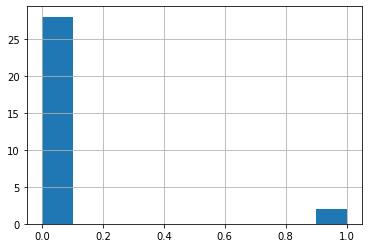

In [25]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count